## 1. Importing Basic Libraries

In [2]:
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import plotly.offline as offline
import ipywidgets as widgets


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.io as pio
pio.renderers.default = 'vscode'

## 2. Data Collection

In [3]:
customer_ds = pd.read_csv("D:\RNW\Project\EDA\Credit Card-EDA\Customer Acqusition.csv", sep=",")
spend_ds = pd.read_csv("D:\RNW\Project\EDA\Credit Card-EDA\spend.csv", sep=",")
repayment_ds = pd.read_csv("D:\RNW\Project\EDA\Credit Card-EDA\Repayment.csv", sep=",")

spend_df = customer_ds.merge(spend_ds, on="Customer", how="left")
payment_df = customer_ds.merge(repayment_ds, on="Customer", how="left")

In [4]:
#Renidexing the columns for spend_df and payment_df


if "No" in spend_df.columns:
    # Drop the "No" column if it already exists
    spend_df.drop(columns=["No"], inplace=True)

# Reset index and start it from 1
spend_df.reset_index(drop=True, inplace=True)
spend_df.index += 1


if "No" in payment_df.columns:
    # Drop the "No" column if it already exists
    payment_df.drop(columns=["No"], inplace=True)

# Reset index and start it from 1
payment_df.reset_index(drop=True, inplace=True)
payment_df.index += 1

# Save to CSV with "No" as the index label
payment_df.to_csv("D:\RNW\Project\EDA\Credit Card-EDA\payment_df.csv", sep=",", index=True, index_label="No")

# Save to CSV with "No" as the index label
spend_df.to_csv("D:\RNW\Project\EDA\Credit Card-EDA\spend_df.csv", sep=",", index=True, index_label="No")


## 3. Preliminary Exploration

In [5]:
#Checking a dataset sample

print("Customer Spend:")
spend_df.sample(5)
print("Customer Payment:")
payment_df.sample(5)

Customer Spend:


,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Type,Amount
101,A7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC,331,25-Jan-04,TRAIN TICKET,461282.47
103,A8,67,PATNA,Silver,100002.0,C8,Salaried_Pvt,8,05-Feb-04,BIKE,155562.58
974,A43,21,BANGALORE,Gold,500000.0,C25,Self Employed,1083,25-Jan-04,FOOD,114273.79
247,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt,242,27-Apr-05,AIR TICKET,205929.95
353,A19,27,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt,343,23-Mar-06,SHOPPING,243960.25


Customer Payment:


,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
701,A33,19,BOMBAY,Platimum,10002.0,C15,Salaried_MNC,682,31-Mar-06,244831.61
1115,A48,42,TRIVANDRUM,Platimum,10001.0,C10,Self Employed,697,15-Jan-04,66771.24
1414,A61,44,COCHIN,Gold,500000.0,C23,Govt,1246,03-Jul-05,299897.35
1204,A51,59,BOMBAY,Platimum,100001.0,C13,Govt,1323,19-Mar-04,40944.31
48,A4,47,BOMBAY,Platimum,10001.0,C4,Govt,204,25-Mar-06,271095.26


In [6]:
#Checking dataset info by feature

print("Customer Spend:")
spend_df.info(verbose=True)
print("")
print("Customer Payment:")
payment_df.info(verbose=True)

Customer Spend:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Age       1500 non-null   int64  
 2   City      1500 non-null   object 
 3   Product   1500 non-null   object 
 4   Limit     1500 non-null   float64
 5   Company   1500 non-null   object 
 6   Segment   1500 non-null   object 
 7   SL No:    1500 non-null   int64  
 8   Month     1500 non-null   object 
 9   Type      1500 non-null   object 
 10  Amount    1500 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 129.0+ KB

Customer Payment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Age       1500 non-null   int64  
 2   City      1500 non-

In [7]:
#Checking the existence of zeros in rows

print("Customer Spend:")
(spend_df==0).sum(axis=0)
print("Customer Payment:")
(payment_df==0).sum(axis=0)

Customer Spend:


Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
SL No:      0
Month       0
Type        0
Amount      0
dtype: int64

Customer Payment:


Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
SL No:      0
Month       0
Amount      0
dtype: int64

In [8]:
#Checking the existence of duplicated rows

print("Customer Spend:")
spend_df.duplicated().sum()
print("Customer Payment:")
payment_df.duplicated().sum()

Customer Spend:


0

Customer Payment:


0

In [9]:
#Checking basic statistical data by feature

print("Customer Spend:")
spend_df.describe(include="all")
print("Customer Payment:")
payment_df.describe(include="all")

Customer Spend:


,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Type,Amount
count,1500,1500.000000,1500,1500,1500.000000,1500,1500,1500.000000,1500,1500,1500.000000
unique,100,NaN,8,3,NaN,41,5,NaN,74,15,NaN
top,A61,NaN,BANGALORE,Gold,NaN,C22,Normal Salary,NaN,12-Jan-04,PETRO,NaN
freq,38,NaN,299,610,NaN,103,441,NaN,80,200,NaN
mean,NaN,44.268667,NaN,NaN,297993.956667,NaN,NaN,750.500000,NaN,NaN,243096.049460
std,NaN,17.512270,NaN,NaN,216239.376333,NaN,NaN,433.157015,NaN,NaN,141349.547367
min,NaN,12.000000,NaN,NaN,10000.000000,NaN,NaN,1.000000,NaN,NaN,720.300000
25%,NaN,28.000000,NaN,NaN,100000.000000,NaN,NaN,375.750000,NaN,NaN,122606.487500
50%,NaN,42.000000,NaN,NaN,500000.000000,NaN,NaN,750.500000,NaN,NaN,239210.360000
75%,NaN,57.000000,NaN,NaN,500000.000000,NaN,NaN,1125.250000,NaN,NaN,361617.632500


Customer Payment:


,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
count,1500,1500.000000,1500,1500,1500.000000,1500,1500,1500.000000,1500,1500.000000
unique,100,NaN,8,3,NaN,41,5,NaN,74,NaN
top,A61,NaN,BANGALORE,Gold,NaN,C22,Normal Salary,NaN,12-Jan-04,NaN
freq,38,NaN,299,610,NaN,103,441,NaN,73,NaN
mean,NaN,44.268667,NaN,NaN,297993.956667,NaN,NaN,750.500000,NaN,247890.054420
std,NaN,17.512270,NaN,NaN,216239.376333,NaN,NaN,433.157015,NaN,145290.382733
min,NaN,12.000000,NaN,NaN,10000.000000,NaN,NaN,1.000000,NaN,55.860000
25%,NaN,28.000000,NaN,NaN,100000.000000,NaN,NaN,375.750000,NaN,118604.905000
50%,NaN,42.000000,NaN,NaN,500000.000000,NaN,NaN,750.500000,NaN,248008.185000
75%,NaN,57.000000,NaN,NaN,500000.000000,NaN,NaN,1125.250000,NaN,367236.890000


## 5. Data Cleaning

* No duplications found  
* No missing, zero or invalid values to treat  
* No outliers found  
* The entire dataset will be taken  

In [10]:
#1 Change some columns names for better interpretability

spend_df.rename({"Month": "Spend_Date", "Type": "Spend_Type", "Amount": "Spend_Amount"}, axis=1, inplace=True)
payment_df.rename({"Month": "Payment_Date", "Amount": "Payment_Amount"}, axis=1, inplace=True)

#2 Create calculated feature that could bring relevant information to the analysis

spend_df["Spend_Month"] = pd.DatetimeIndex(spend_df["Spend_Date"]).month
spend_df["Spend_Year"] = pd.DatetimeIndex(spend_df["Spend_Date"]).year
payment_df["Payment_Month"] = pd.DatetimeIndex(payment_df["Payment_Date"]).month
payment_df["Payment_Year"] = pd.DatetimeIndex(payment_df["Payment_Date"]).year
spend_df["Spend Amount to Limit Ratio"] = spend_df["Spend_Amount"] / spend_df["Limit"]

#3 Remove irrelevant features for the analysis

spend_df.drop(["SL No:"], axis=1, inplace=True)
payment_df.drop(["SL No:"], axis=1, inplace=True)

#4 Convert categorical features to dummies so we can analyze their correlations

spend_df["Product_Level"] = spend_df["Product"].apply(lambda x: ["Silver", "Gold", "Platimum"].index(x))+1
payment_df["Product_Level"] = payment_df["Product"].apply(lambda x: ["Silver", "Gold", "Platimum"].index(x))+1

spend_df = pd.concat([spend_df, pd.get_dummies(spend_df["Segment"], prefix="Segment")], axis=1)
payment_df = pd.concat([payment_df, pd.get_dummies(payment_df["Segment"], prefix="Segment")], axis=1)
spend_df = pd.concat([spend_df, pd.get_dummies(spend_df["Spend_Type"], prefix="Spend_Type")], axis=1)

In [11]:
# Save to CSV with "No" as the index label
payment_df.to_csv("D:\RNW\Project\EDA\Credit Card-EDA\payment_df.csv", sep=",")

# Save to CSV with "No" as the index label
spend_df.to_csv("D:\RNW\Project\EDA\Credit Card-EDA\spend_df.csv", sep=",")


## 6. Data Exploration

6.1 Checking Top Customers by Spend Amount

In [12]:
#Checking Top Customers by Spend Amount

pivot = spend_df.pivot_table(index=["Customer", "Age", "City", "Product", "Limit", "Segment"], columns=["Spend_Year"], values=["Spend_Amount"], aggfunc="sum", margins=True).reset_index()
pivot.reindex(pivot["Spend_Amount"].sort_values(by="All", ascending=False).index)


Customer Age       City   Product     Limit        Segment  \
Spend_Year                                                              
100             All                                                     
57              A60  28   CALCUTTA      Gold  500000.0   Salaried_Pvt   
32              A38  47    CHENNAI  Platimum  500000.0  Self Employed   
35              A40  37   CALCUTTA  Platimum  500000.0   Salaried_Pvt   
14              A21  57     COCHIN  Platimum   10002.0  Normal Salary   
..              ...  ..        ...       ...       ...            ...   
71              A73  75   CALCUTTA    Silver  100001.0  Self Employed   
75              A77  35  BANGALORE    Silver  500000.0  Self Employed   
74              A76  66  BANGALORE    Silver  500000.0  Self Employed   
87              A88  63  BANGALORE      Gold  500000.0           Govt   
88              A89  72   CALCUTTA      Gold  500000.0           Govt   

            Spend_Amount                                            
Spend_Year          2004          2005          2006           All  
100         1.044926e+08  1.284956e+08  1.316559e+08  3.646441e+08  
57          2.881407e+06  4.469330e+06  3.670194e+06  1.102093e+07  
32          2.989801e+06  3.285401e+06  2.827601e+06  9.102804e+06  
35          1.867680e+06  4.057569e+06  3.136619e+06  9.061869e+06  
14          2.528561e+06  2.632416e+06  3.842820e+06  9.003797e+06  
..                   ...           ...           ...           ...  
71                   NaN  4.738056e+04           NaN  4.738056e+04  
75                   NaN           NaN  3.104893e+04  3.104893e+04  
74                   NaN  3.006644e+04           NaN  3.006644e+04  
87                   NaN           NaN  2.651891e+04  2.651891e+04  
88                   NaN           NaN  2.497202e+04  2.497202e+04  

[101 rows x 10 columns]

6.2 Checking Top Customers by Payment Amount

In [13]:
#Checking Top Customers by Payment Amount

pivot = payment_df.pivot_table(index=["Customer", "Age", "City", "Product", "Limit", "Segment"], columns=["Payment_Year"], values=["Payment_Amount"], aggfunc="sum", margins=True).reset_index()
pivot.reindex(pivot["Payment_Amount"].sort_values(by="All", ascending=False).index)

Customer Age       City   Product     Limit        Segment  \
Payment_Year                                                              
100               All                                                     
58                A61  44     COCHIN      Gold  500000.0           Govt   
57                A60  28   CALCUTTA      Gold  500000.0   Salaried_Pvt   
5                 A13  29  BANGALORE      Gold  500000.0   Salaried_MNC   
15                A22  27     BOMBAY    Silver  100000.0  Self Employed   
..                ...  ..        ...       ...       ...            ...   
69                A71  34     BOMBAY  Platimum   10002.0  Self Employed   
2                A100  36     COCHIN    Silver  100000.0   Salaried_MNC   
76                A78  71   CALCUTTA    Silver  500000.0  Self Employed   
99                A99  35   CALCUTTA  Platimum   10002.0  Self Employed   
75                A77  35  BANGALORE    Silver  500000.0  Self Employed   

             Payment_Amount                                            
Payment_Year           2004          2005          2006           All  
100             98420859.72  1.325657e+08  1.408485e+08  3.718351e+08  
58               2518154.95  4.276861e+06  3.744127e+06  1.053914e+07  
57               2890721.81  3.742856e+06  3.242713e+06  9.876291e+06  
5                2337012.77  3.757673e+06  3.477315e+06  9.572001e+06  
15               3455774.79  3.395983e+06  2.520803e+06  9.372562e+06  
..                      ...           ...           ...           ...  
69                 56286.33  3.099774e+04           NaN  8.728407e+04  
2                  69551.19           NaN           NaN  6.955119e+04  
76                      NaN           NaN  5.534481e+04  5.534481e+04  
99                 25682.73           NaN           NaN  2.568273e+04  
75                      NaN           NaN  3.159620e+03  3.159620e+03  

[101 rows x 10 columns]

6.3 Checking Customers by Product and Limit

In [14]:
# Configure matplotlib font
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

# Preparing the data and visualization
pivot = spend_df.pivot_table(index=["Customer", "Product"], columns=[], values=["Limit"], aggfunc="mean").reset_index()
fig = px.treemap(
    pivot,
    path=["Customer", "Product"],
    values="Limit",
    color="Product",
    title="Customers by Product and Limit"
)

fig

6.4 Checking Customers by City and Spend Amount

In [15]:
#Checking Customers by City and Spend Amount

pivot = spend_df.pivot_table(index=["Customer", "City"], columns=[], values=["Spend_Amount"], aggfunc="sum").reset_index()
fig = px.treemap(pivot, path=["Customer", "City"], values="Spend_Amount", color="City", title="Customers by City and Spend Amount").show()

6.5 Checking Customers by Segment and Spend Amount

In [16]:
#Checking Customers by Segment and Spend Amount

pivot = spend_df.pivot_table(index=["Customer", "Segment"], columns=[], values=["Spend_Amount"], aggfunc="sum").reset_index()
fig = px.treemap(pivot, path=["Customer", "Segment"], values="Spend_Amount", color="Segment", title="Customers by Segment and Spend Amount").show()

6.6 Checking Customers by Spend Type and Amount

In [17]:
spend_df.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Date,Spend_Type,Spend_Amount,...,Spend_Type_CAR,Spend_Type_CLOTHES,Spend_Type_FOOD,Spend_Type_JEWELLERY,Spend_Type_MOVIE TICKET,Spend_Type_PETRO,Spend_Type_RENTAL,Spend_Type_SANDALS,Spend_Type_SHOPPING,Spend_Type_TRAIN TICKET
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,...,False,False,False,True,False,False,False,False,False,False
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,03-Jan-04,PETRO,410556.13,...,False,False,False,False,False,True,False,False,False,False
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,...,False,True,False,False,False,False,False,False,False,False
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,...,False,False,True,False,False,False,False,False,False,False
5,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,...,False,False,False,False,False,False,False,False,False,False


In [18]:
spend_df.to_csv("spend_df_clean.csv", index=False)

In [19]:
#Checking Customers by Spend Type and Amount

pivot = spend_df.pivot_table(index=["Customer", "Spend_Type"], columns=[], values="Spend_Amount", aggfunc="sum").reset_index()
fig = px.treemap(pivot, path=["Customer", "Spend_Type"], values="Spend_Amount", color="Spend_Type", title="Customers by Spend Type and Amount").show()

6.7 Checking Customers by Age and Spend Amount Using Bubble Chart

In [20]:
#Checking Customers by Spend Type and Amount
def update_map(spend_df, year, month):
    print(f"Year range: {year}")
    print(f"Month range: {month}")
    global update_ds, pivot, fig
    update_ds = spend_df[(spend_df["Spend_Year"] >= year[0]) & (spend_df["Spend_Year"] <= year[-1]) &
    (spend_df["Spend_Month"] >= month[0]) & (spend_df["Spend_Month"] <= month[-1])][["Spend_Year", "Spend_Month", "Age", "Spend_Amount", "Spend_Type", "Customer"]]
    pivot = update_ds.pivot_table(index=["Age", "Customer"], columns=[], values=["Spend_Amount"], aggfunc="sum").reset_index()
    fig = px.scatter(pivot, x="Age", y="Spend_Amount", size="Spend_Amount", color="Customer", hover_name="Customer", size_max=30, title="Customers by Age and Spend Amount").show()
    
year_select = widgets.SelectionRangeSlider(
              options=sorted(spend_df["Spend_Year"].unique().tolist()),
              index=(0,1),
              description="Select year:",
              disabled=False)

month_select = widgets.SelectionRangeSlider(
              options=sorted(spend_df["Spend_Month"].unique().tolist()),
              index=(0,1),
              description="Select month:",
              disabled=False)

widgets.interactive(update_map, spend_df=widgets.fixed(spend_df), year=year_select, month=month_select)

interactive(children=(SelectionRangeSlider(description='Select year:', index=(0, 1), options=(2004, 2005, 2006…

6.8 Checking Spend Amount by City

In [21]:
# Checking Spend Amount by City

coordinates_ds = pd.DataFrame({"City": ["COCHIN", "BANGALORE", "CHENNAI", "CALCUTTA", "BOMBAY", "PATNA", "TRIVANDRUM", "DELHI"], "Lat": [9.9312, 12.9716, 13.0827, 22.5726, 19.0760, 25.5941, 8.5241, 28.7041], "Lon": [76.2673, 77.5946, 80.2707, 88.3639, 72.8777, 85.1376, 76.9366, 77.1025]})
plotly_ds = spend_df.merge(coordinates_ds, on="City", how="left") 
pivot = plotly_ds.pivot_table(index=["Lat", "Lon", "City"], columns=[], values=["Spend_Amount"], aggfunc="sum").reset_index()

fig = px.scatter_map(pivot,
                       lat="Lat",
                       lon="Lon",
                       color="City",
                       size="Spend_Amount",
                       hover_name="Spend_Amount",
                       color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=50,
                       zoom=3.5)

fig.update_layout(mapbox_style="open-street-map", height=600, margin={"r":0, "t":0, "l":0, "b":0})

6.9 Checking Dataset Behaviour Along the Time

<Axes: xlabel='Spend_Year', ylabel='Spend_Amount'>

Text(0.5, 0.98, 'Spend Amount Behaviour Along The time')

<Axes: xlabel='Payment_Year', ylabel='Payment_Amount'>

Text(0.5, 0.98, 'Payment Amount Behaviour Along The time')

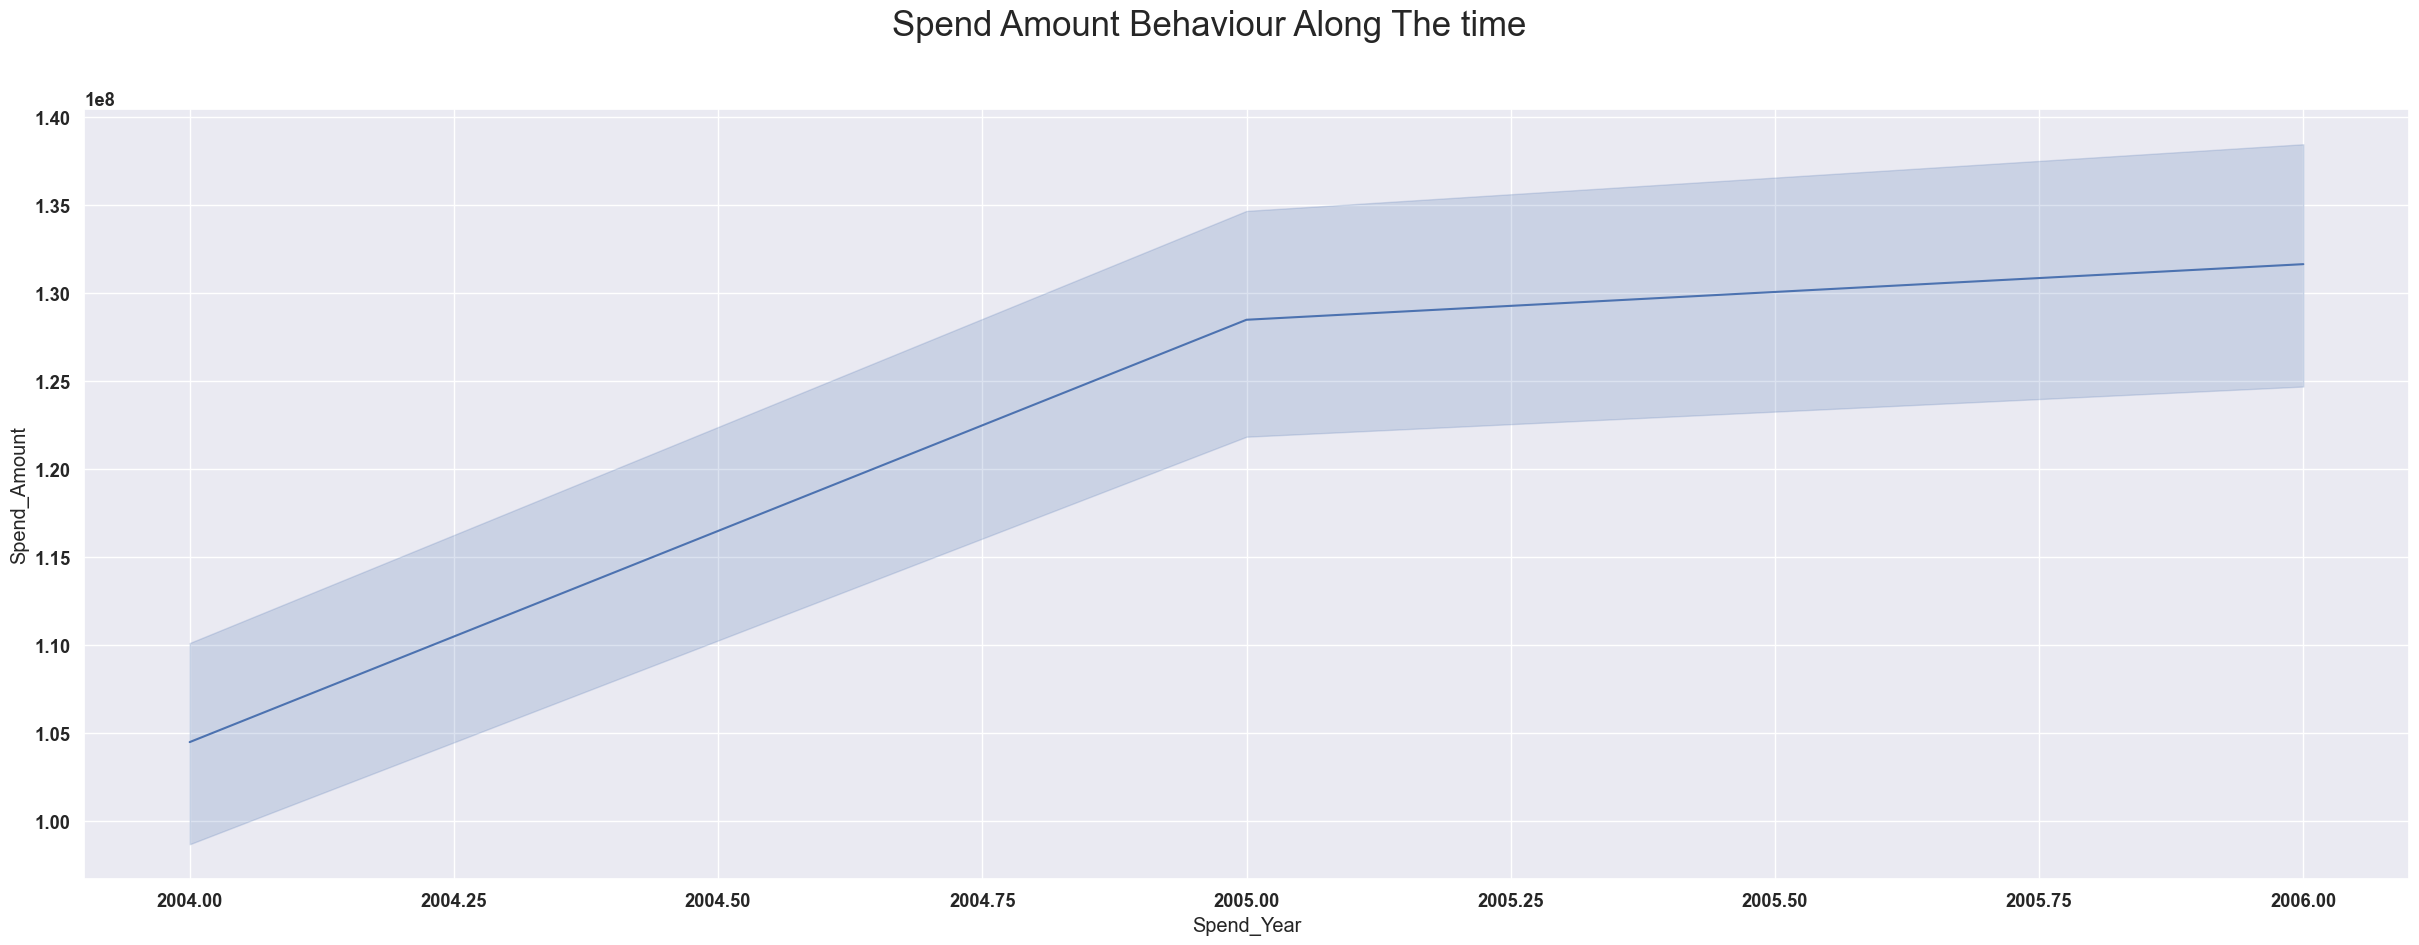

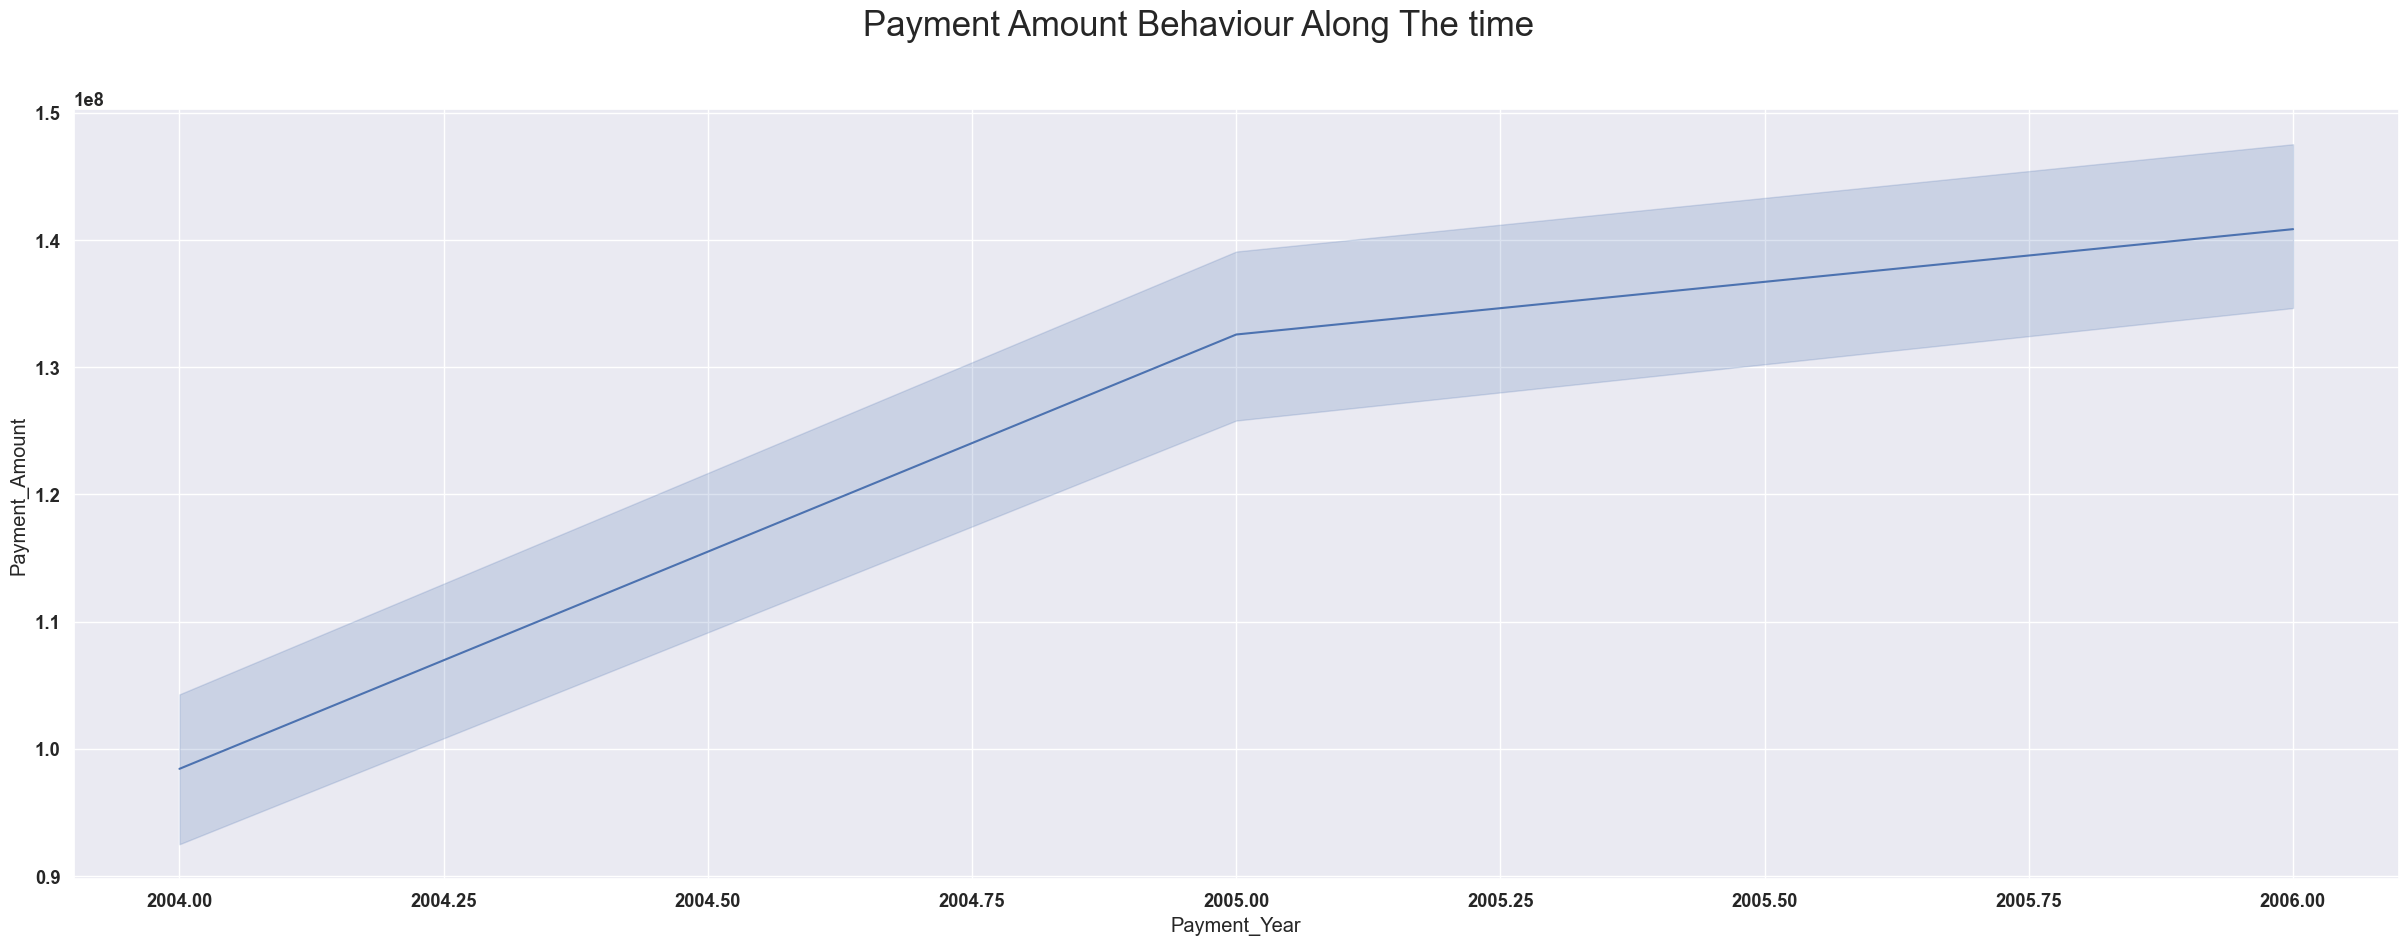

In [22]:
#Checking Dataset Behaviour Along the Time

sns.set(font_scale=1.2)

fig, axarr = plt.subplots(1, 1, figsize=(30, 10))
sns.lineplot(data=spend_df, x="Spend_Year", y="Spend_Amount", estimator="sum")
fig.suptitle("Spend Amount Behaviour Along The time", fontsize=25)

fig, axarr = plt.subplots(1, 1, figsize=(30, 10))
sns.lineplot(data=payment_df, x="Payment_Year", y="Payment_Amount", estimator="sum")
fig.suptitle("Payment Amount Behaviour Along The time", fontsize=25)

6.10 Checking Categorical Variables Bar and Pie Charts

<Axes: xlabel='City'>

<Axes: ylabel='count'>

Text(0.5, 0.98, 'City Frequency')

(array([], dtype=float64), [])

(array([], dtype=float64), [])

<Axes: xlabel='Product'>

<Axes: ylabel='count'>

Text(0.5, 0.98, 'Product Frequency')

(array([], dtype=float64), [])

(array([], dtype=float64), [])

<Axes: xlabel='Segment'>

<Axes: ylabel='count'>

Text(0.5, 0.98, 'Segment Frequency')

(array([], dtype=float64), [])

(array([], dtype=float64), [])

<Axes: xlabel='Spend_Type'>

<Axes: ylabel='count'>

Text(0.5, 0.98, 'Spend Type Frequency')

(array([], dtype=float64), [])

(array([], dtype=float64), [])

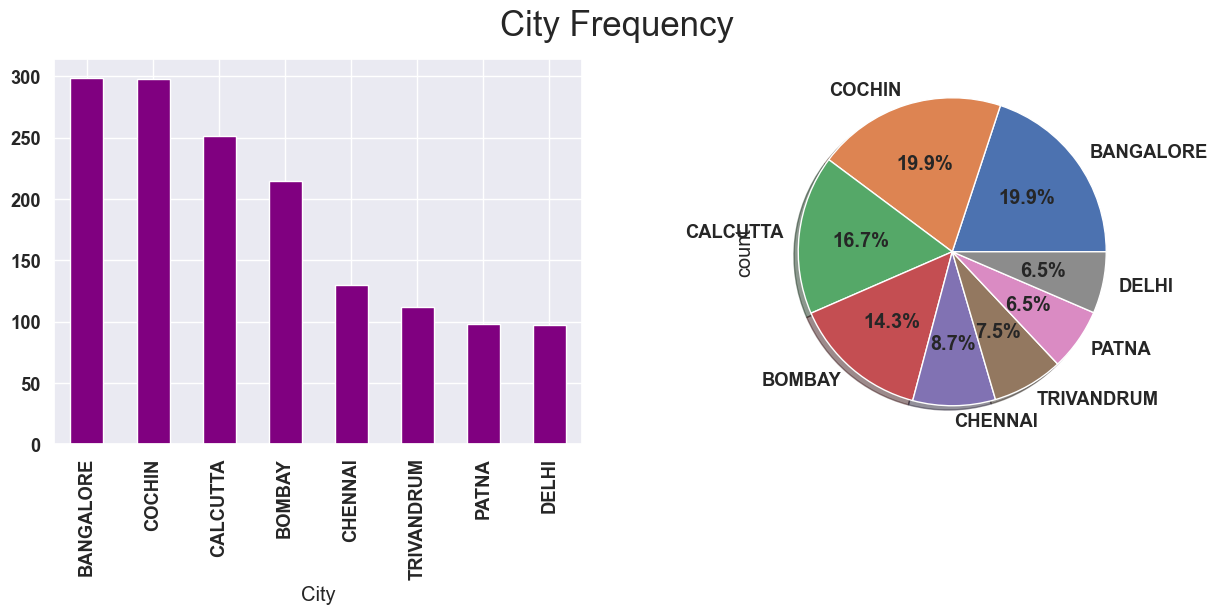

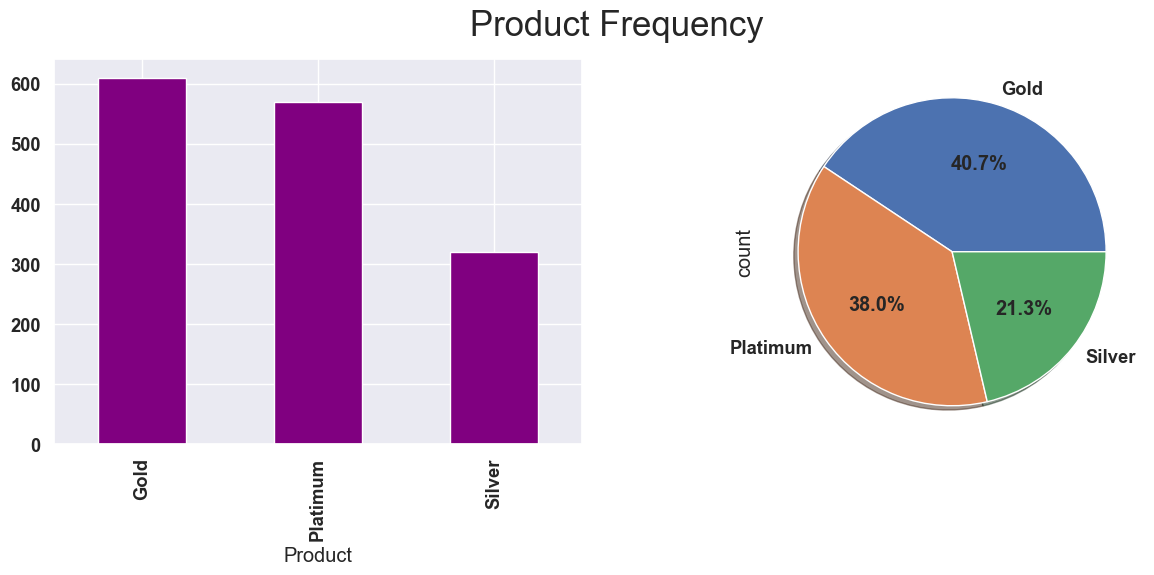

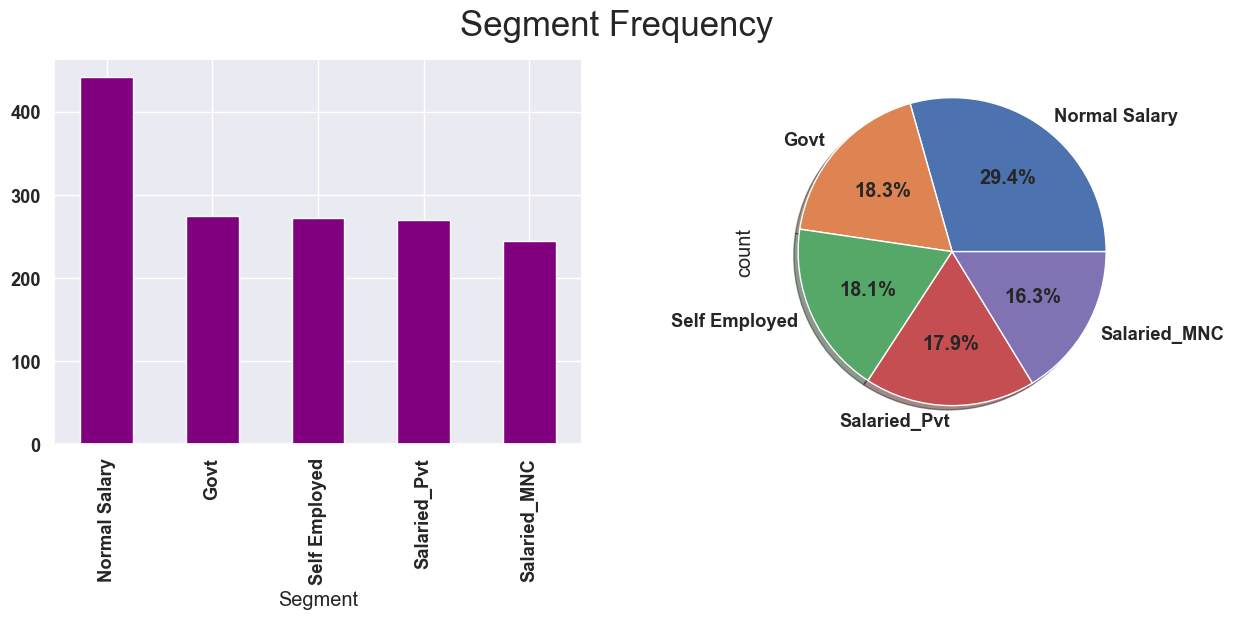

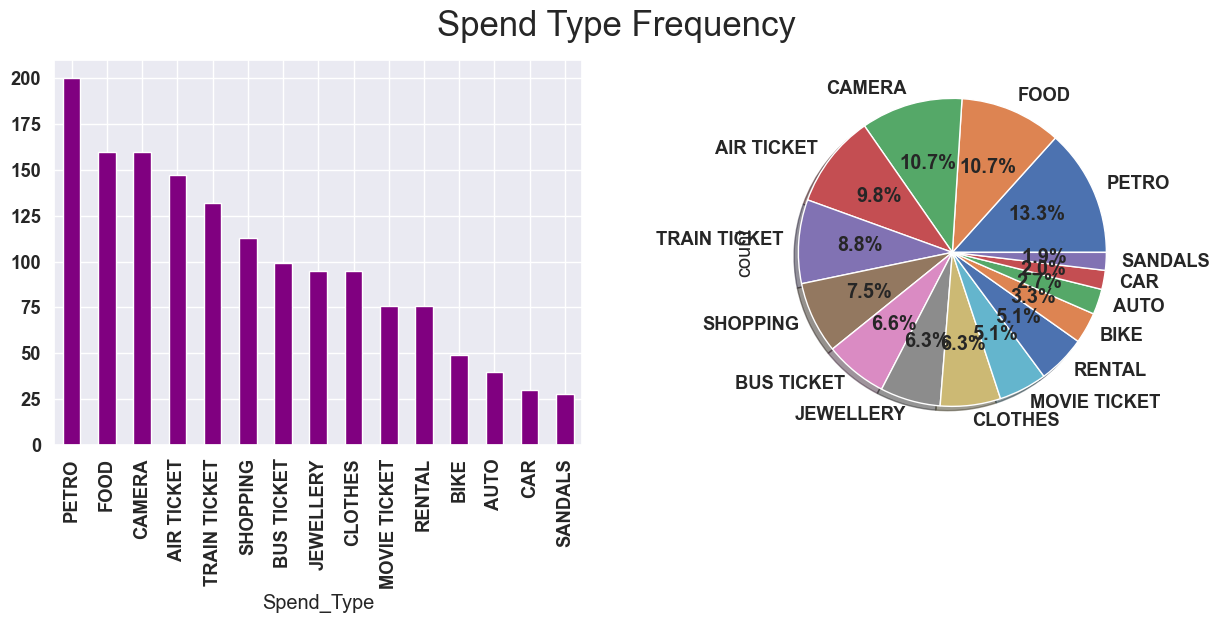

In [23]:
#Plotting Categorical Variables

fig, ax = plt.subplots(1, 2, figsize=(15,5))
spend_df["City"].value_counts().plot.bar(color="purple", ax=ax[0])
spend_df["City"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,ax=ax[1])
fig.suptitle("City Frequency", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
spend_df["Product"].value_counts().plot.bar(color="purple", ax=ax[0])
spend_df["Product"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,ax=ax[1])
fig.suptitle("Product Frequency", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
spend_df["Segment"].value_counts().plot.bar(color="purple", ax=ax[0])
spend_df["Segment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,ax=ax[1])
fig.suptitle("Segment Frequency", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
spend_df["Spend_Type"].value_counts().plot.bar(color="purple", ax=ax[0])
spend_df["Spend_Type"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,ax=ax[1])
fig.suptitle("Spend Type Frequency", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

6.11 Checking Numerical Variables Histogram, Boxplot and Violinplot

Text(0.5, 0.98, 'Age Distribution')

<Axes: xlabel='Age', ylabel='Count'>

<Axes: ylabel='Age'>

<Axes: ylabel='Age'>

([0], [Text(0, 0, '')])

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

Text(0.5, 0.98, 'Limit Distribution')

<Axes: xlabel='Limit', ylabel='Count'>

<Axes: ylabel='Limit'>

<Axes: ylabel='Limit'>

([0], [Text(0, 0, '')])

(array([-200000., -100000.,       0.,  100000.,  200000.,  300000.,
         400000.,  500000.,  600000.,  700000.]),
 [Text(0, -200000.0, '−200000'),
  Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000'),
  Text(0, 700000.0, '700000')])

Text(0.5, 0.98, 'Spend Amount Distribution')

<Axes: xlabel='Spend_Amount', ylabel='Count'>

<Axes: ylabel='Spend_Amount'>

<Axes: ylabel='Spend_Amount'>

([0], [Text(0, 0, '')])

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 [Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000')])

Text(0.5, 0.98, 'Payment Amount Distribution')

<Axes: xlabel='Payment_Amount', ylabel='Count'>

<Axes: ylabel='Payment_Amount'>

<Axes: ylabel='Payment_Amount'>

([0], [Text(0, 0, '')])

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 [Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000')])

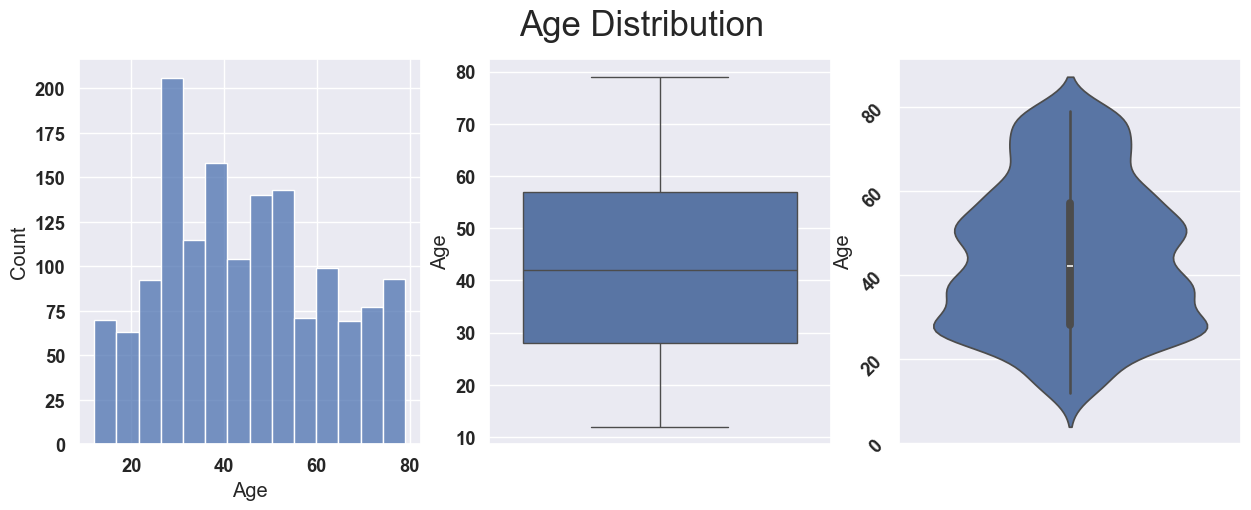

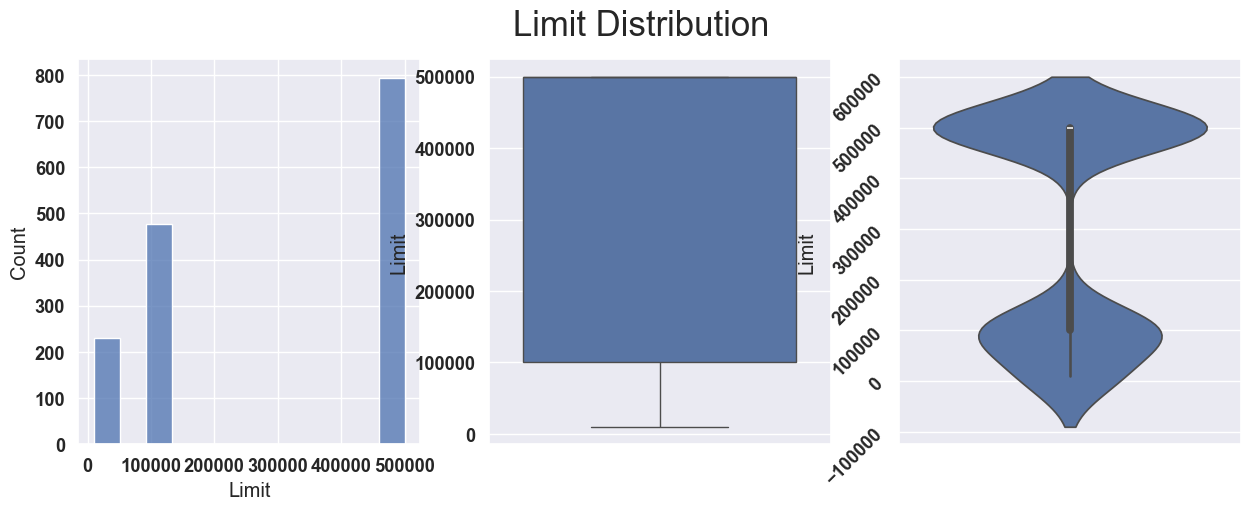

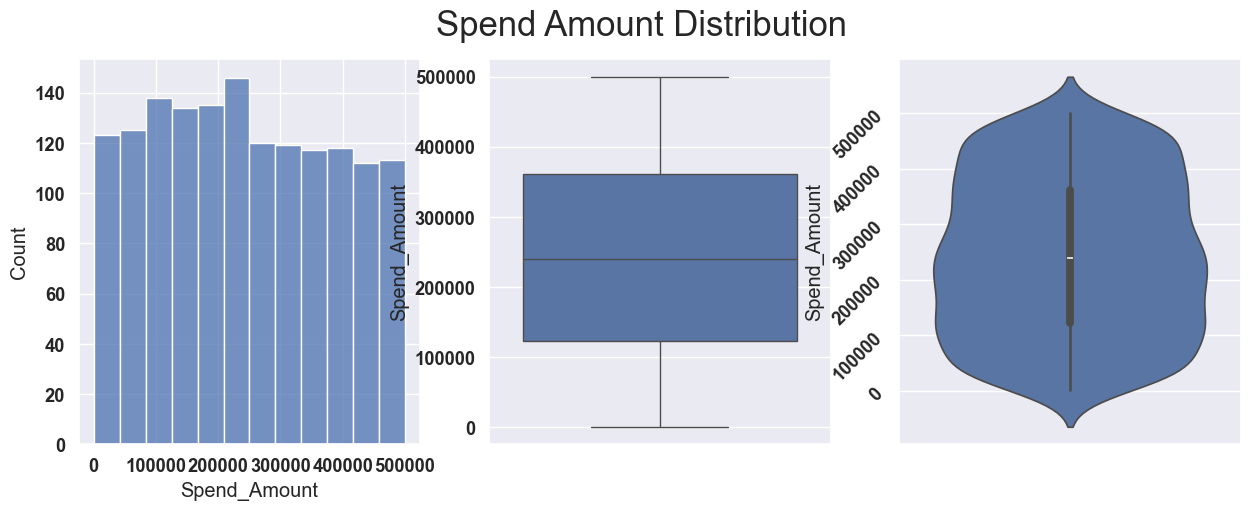

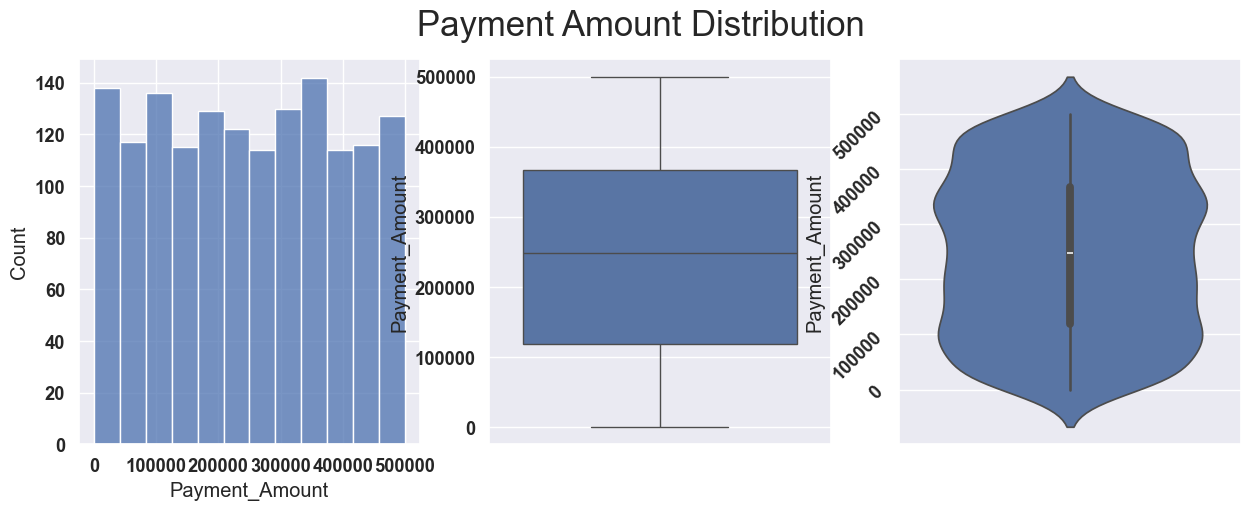

In [24]:
#Plotting Numerical Variables

fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Age Distribution", fontsize=25)
sns.histplot(spend_df["Age"], ax=ax[0])
sns.boxplot(spend_df["Age"], ax=ax[1])
sns.violinplot(spend_df["Age"], ax=ax[2])
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Limit Distribution", fontsize=25)
sns.histplot(spend_df["Limit"], ax=ax[0])
sns.boxplot(spend_df["Limit"], ax=ax[1])
sns.violinplot(spend_df["Limit"], ax=ax[2])
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Spend Amount Distribution", fontsize=25)
sns.histplot(spend_df["Spend_Amount"], ax=ax[0])
sns.boxplot(spend_df["Spend_Amount"], ax=ax[1])
sns.violinplot(spend_df["Spend_Amount"], ax=ax[2])
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Payment Amount Distribution", fontsize=25)
sns.histplot(payment_df["Payment_Amount"], ax=ax[0])
sns.boxplot(payment_df["Payment_Amount"], ax=ax[1])
sns.violinplot(payment_df["Payment_Amount"], ax=ax[2])
plt.xticks(rotation=90)
plt.yticks(rotation=45)

## 7. Correlations Analysis

                                Limit  Spend_Amount  Spend_Month  Spend_Year  \
Limit                        1.000000      0.011970     0.024472    0.016492   
Spend_Amount                 0.011970      1.000000    -0.034344   -0.026225   
Spend_Month                  0.024472     -0.034344     1.000000    0.316121   
Spend_Year                   0.016492     -0.026225     0.316121    1.000000   
Spend Amount to Limit Ratio -0.541081      0.271191    -0.014895    0.024155   

                             Spend Amount to Limit Ratio  
Limit                                          -0.541081  
Spend_Amount                                    0.271191  
Spend_Month                                    -0.014895  
Spend_Year                                      0.024155  
Spend Amount to Limit Ratio                     1.000000  


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

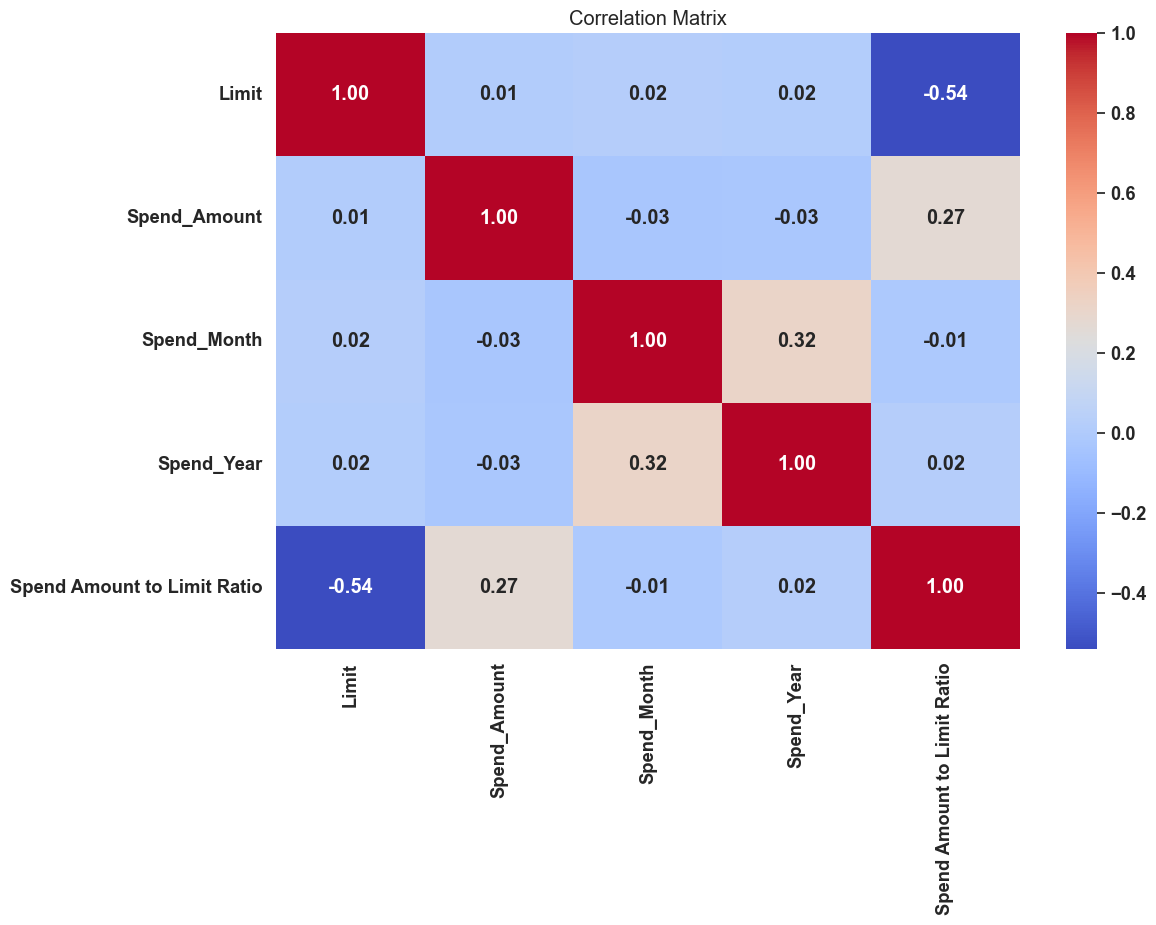

In [25]:
# Selecting numeric columns for correlation analysis
numeric_columns = [
    'Limit','Spend_Amount', 'Spend_Month', 'Spend_Year','Spend Amount to Limit Ratio'] 

# Extract numeric columns
correlation_df = spend_df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize using a heatmap (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

                     Age     Limit  Payment_Amount  Payment_Month  \
Age             1.000000 -0.066271       -0.011293       0.002879   
Limit          -0.066271  1.000000        0.033224      -0.021795   
Payment_Amount -0.011293  0.033224        1.000000      -0.004226   
Payment_Month   0.002879 -0.021795       -0.004226       1.000000   
Payment_Year    0.001017  0.056430        0.033117       0.296478   

                Payment_Year  
Age                 0.001017  
Limit               0.056430  
Payment_Amount      0.033117  
Payment_Month       0.296478  
Payment_Year        1.000000  


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

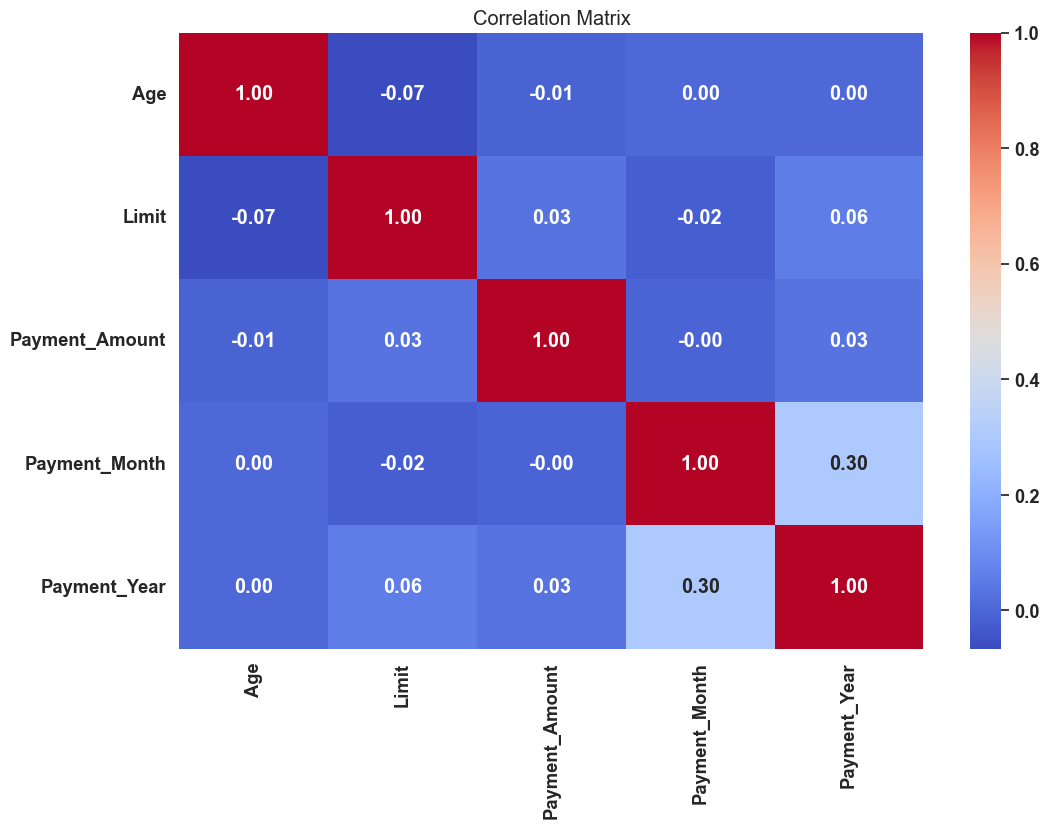

In [26]:
# Selecting numeric columns for correlation analysis
numeric_columns = [
    'Age', 'Limit', 'Payment_Amount', 'Payment_Month', 'Payment_Year'
]

# Extract numeric columns
correlation_df = payment_df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize using a heatmap (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()